In [1]:
!pip install -r requirements.txt
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git

  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\mspat\appdata\local\temp\pip-req-build-5c85gs9g
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyimq: filename=pyimq-0.1-py3-none-any.whl size=26675 sha256=922d0f2895e32e30fa7e00f73a79184cd5e5f67addf0224fca7ef68e067977fb
  Stored in directory: C:\Users\mspat\AppData\Local\Temp\pip-ephem-wheel-cache-5r0qtjhe\wheels\bf\a0\6a\f2575bbb691c74edd4f8783f5d9b05fa9c5fb4e25fe99f82f9
Successfully built pyimq


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\mspat\AppData\Local\Temp\pip-req-build-5c85gs9g'


In [2]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=Cy3 --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing Cy3_20230206_B2-10_01.tif
Done analyzing Cy3_20230206_B2-11_01.tif
Done analyzing Cy3_20230206_B2-12_01.tif
Done analyzing Cy3_20230206_B2-13_01.tif
Done analyzing Cy3_20230206_B2-14_01.tif
Done analyzing Cy3_20230206_B2-15_01.tif
Done analyzing Cy3_20230206_B2-16_01.tif
Done analyzing Cy3_20230206_B2-1_01.tif
Done analyzing Cy3_20230206_B2-2_01.tif
Done analyzing Cy3_20230206_B2-3_01.tif
Done analyzing Cy3_20230206_B2-4_01.tif
Done analyzing Cy3_20230206_B2-5_01.tif
Done analyzing Cy3_20230206_B2-6_01.tif
Done analyzing Cy3_20230206_B2-7_01.tif
Done analyzing Cy3_20230206_B2-8_01.tif
Done analyzing Cy3_20230206_B2-9_01.tif
Done analyzing Cy3_20230206_B3-10_01.tif
Done analyzing Cy3_20230206_B3-11_01.tif
Done analyzing Cy3_20230206_B3-12_01.tif
Done analyzing Cy3_20230206_B3-13_01.tif
Done analyzing Cy3_20230206_B3-14_01.tif
Done analyzing Cy3_20230206_B3-15_01.tif
Done analyzing Cy3_20230206_B3-16_01.tif
Done analyzing Cy3

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
imaq_4h=pd.read_csv('Cy3/2023-02-07_PyIQ_output/19-35-28_PyIQ_analyze_out.csv')
imaq_4h.tail()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
283,Cy3\Cy3_20230206_D4-11_01.tif,0.895719,789297.0,5.412310,334.219284,3.719433,4.988034,2.270810e+09,334.313225,0.016077,...,0.452443,0.016483,0.983517,0.945745,0.994079,0.031401,0.536435,0.232928,0.503601,0.060316
284,Cy3\Cy3_20230206_B7-5_01.tif,0.673451,859812.0,3.345677,293.576496,3.611463,4.972372,2.270810e+09,293.614189,-0.028636,...,0.397424,0.016004,0.983996,0.942775,0.989453,0.024835,0.471130,0.205378,0.548592,0.037285
285,Cy3\Cy3_20230206_C2-10_01.tif,0.854051,718244.0,4.920681,306.936879,3.458355,4.973433,2.270810e+09,307.069649,-0.043723,...,0.415510,0.015326,0.984674,0.942976,0.983897,0.025446,0.492721,0.214832,0.458267,0.054837
286,Cy3\Cy3_20230206_C2-12_01.tif,1.298458,765438.0,3.514375,266.199398,3.361850,4.926781,2.270810e+09,266.234592,0.197115,...,0.360362,0.014898,0.985102,0.934131,0.927403,0.020659,0.427197,0.184603,0.488378,0.039165
287,Cy3\Cy3_20230206_C4-15_01.tif,1.216778,725291.0,3.277149,251.243155,2.971765,5.089710,2.270810e+09,252.232578,-0.149539,...,0.340116,0.013169,0.986831,0.965023,0.944926,0.023332,0.404730,0.175361,0.462763,0.036521


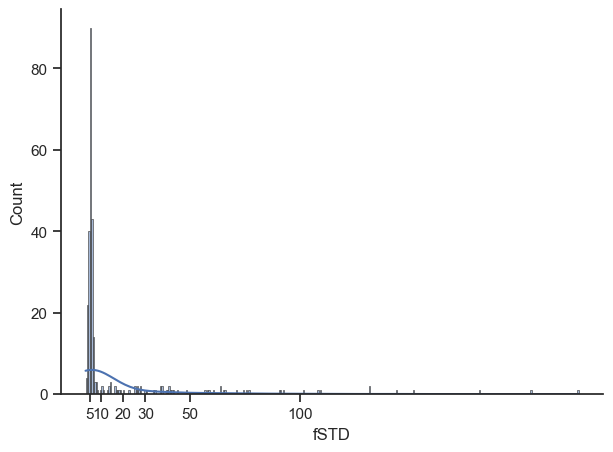

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=imaq_4h, 
    x="fSTD", 
    kde=True,
    edgecolor=".3",
    linewidth=.5,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5, 10, 20, 30, 50, 100])

In [11]:
imaq_4h_sel=imaq_4h[imaq_4h['fSTD']<3]

In [12]:
imaq_4h_sel.Filename.count()

1

In [13]:
imaq_4h_sel.to_csv('Cy3_20230206_CHOK1_HeLa_4h_filterOut.csv', sep=";") 